## Chapter 08-1 합성곱 신경망의 구성 요소

#### 로지스틱 회귀 : 81%
#### 딥러닝 : 87%


#### 뉴런마다 입력 개수만큼의 가중치가 있고, 이는 모든 입력에 가중치를 곱한다.
#### 즉 경사 하강법을 통해 손실이 낮아지도록 최적의 가중치와 절편을 찾아간다.
#### -> 이는 입력 개수에 상관없이 뉴런 개수에 출력도 같게 된다.
<br>


#### 합성곱 : 입력 데이터 전체에 가중치를 적용하는 것이 아닌 일부에 가중치를 곱함
#### 합성곱은 예시로 첫 번째 합성곰에 사용된 가중치 3개와 절편이 두 번째 합성곱에도 사용됨
#### 밀집층의 경우 10개의 가중치를 가지고 1개의 출력
#### 합성곱의 경우 3개의 가중치를 가지고 8개의 출력
#### 물론 여기서 가중치의 개수는 하이퍼파라미터 -> 출력 개수 정할 수 있다.

## CNN : 합성곱 신경망, 완전 연결 신경망과 달리 뉴런을 필터 혹은 커널이라 부름
#### 완전 연결 신경망은 밀집층만 사용하여 만든 신경망을 말함.
<br>

## 특성 맵 : 합성곱 계산을 통해 얻은 출력을 말한다.
#### EX) 4,4 입력을 커널 크기 3,3으로 하여 총 4개의 출력을 만듦, 즉 2,2 형태의 특성 맵
#### EX) 이러한 필터를 3개 사용하면 2,2,3의 3차원 배열이 된다.

In [2]:
from tensorflow import keras
#입력 위를 이동하는 합성곱은 Conv2D
keras.layers.Conv2D(10, kernel_size=(3,3), activation='relu')
#필터 10개, 커널 크기, 활성화 함수
#특성 맵은 활성화 함수를 통과한 값을 말함.

#### 패딩 : 입력 배열의 주위를 가상의 원소로 채우는 것
#### EX) 4,4크기를 3,3 커널로 2,2 특성 맵이 나온 것을, 패딩을 통해 6,6크기로 적용해 4,4 특성 맵 얻을 수 있음
#### 세임 패딩 : 입력 주위에 0으로 패딩 하는 것 (합성곱에서 자주 사용)
#### 밸리드 패딩 : 패딩 없이 순수한 입력 배열에서만 합성곱을 사용 (무조건 특성 맵 크기 줄어듦)
#### 이는 이미지에서 모서리에 있는 중요한 정보가 특성 맵으로 잘 전달되지 않는 것을 방지하기 위해 사용
 

In [ ]:
keras.layers.Conv2D(10, kernel_size=(3,3), activation='relu', padding='same') #세임 패딩

#### 스트라이드 : 이동의 크기, 기본적으론 1, 커질수록 특성 맵 크기 작아짐


In [ ]:
keras.layers.Conv2D(10, kernel_size=(3,3), activation='relu', padding='same', strides=1) #세임 패딩, 스트라이드1

#### 폴링 : 합성곱 층에서 만든 특성 맵의 가로세로 크기를 줄이는 역할을 수행, 특성맵 개수는 안 줄어듦
#### EX) 2,2,3 -> 1,1,3
#### 폴링은 특성 맵에서 가로세로에 다시 합성곱하여 줄이는 느낌, 대신 차원은 그대로
#### 최대풀링 : 가장 큰 값을 풀링
#### 평균풀링 : 평균값을 풀링
#### 또한 풀링에서는 겹치지 않고 이동, 2,2는 가로세로 2칸씩 이동


In [ ]:
keras.layers.MaxPooling2D(2, strides=2, padding='valid') #풀링 2,2 수행

## Chapter 08-2 합성곱 신경망을 사용한 이미지 분류

In [1]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다.
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

#차원(깊이)를 마지막에 추가해줌
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [3]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))

In [4]:
#풀링 층 추가
model.add(keras.layers.MaxPooling2D(2))

In [5]:
#(28,28,32) -> 풀링 -> (14,14,32)

#두 번째 합성곱-풀링 층 추가
model.add(keras.layers.Conv2D(64,kernel_size=3, activation='relu', padding='same'))
model. add(keras.layers.MaxPooling2D(2))

In [6]:
#(7,7,64) 최종

#3차원 특성 맵을 일렬로 펼침 -> 마지막 10개의 뉴런을 가진 출력층에서 확률 계산 위해
#중간에 하나의 밀집 은닉층을 추가로
model.add(keras.layers.Flatten())
#은닉층은 100개의 뉴런 사용, 합성곱층과 마찬가지로 렐루
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.4))
#10개의 클래스 분류 , 소프트맥스
model.add(keras.layers.Dense(10, activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

In [9]:
#첫번째 = 3*3*1*32+32 = 320 파라미터
#두번째 = 3*3*32*64+64 = 18496 파라미터
#Flatten = 7,7,64 -> 3136 1차원 배열
#은닉층 3136*100+100 = 313700 파라미터
#출력층 : 100*10+10 = 1010 파라미터

#그림으로 구성 출력
keras.utils.plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [10]:
#입력과 출력의 크기도 보여줌
keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [11]:
#모델 컴파일과 훈련
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history=model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 49s 32ms/step - loss: 0.5075 - accuracy: 0.8186 - val_loss: 0.3218 - val_accuracy: 0.8819
Epoch 2/20
   3/1500 [..............................] - ETA: 45s - loss: 0.4123 - accuracy: 0.8750

c:\Users\gudtj\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 43s 29ms/step - loss: 0.3372 - accuracy: 0.8785 - val_loss: 0.2711 - val_accuracy: 0.8987
Epoch 3/20
1500/1500 [==============================] - 46s 31ms/step - loss: 0.2907 - accuracy: 0.8952 - val_loss: 0.2445 - val_accuracy: 0.9084
Epoch 4/20
1500/1500 [==============================] - 47s 31ms/step - loss: 0.2576 - accuracy: 0.9055 - val_loss: 0.2365 - val_accuracy: 0.9128
Epoch 5/20
1500/1500 [==============================] - 46s 30ms/step - loss: 0.2351 - accuracy: 0.9132 - val_loss: 0.2284 - val_accuracy: 0.9141
Epoch 6/20
1500/1500 [==============================] - 47s 31ms/step - loss: 0.2155 - accuracy: 0.9217 - val_loss: 0.2125 - val_accuracy: 0.9234
Epoch 7/20
1500/1500 [==============================] - 46s 31ms/step - loss: 0.1988 - accuracy: 0.9269 - val_loss: 0.2164 - val_accuracy: 0.9212
Epoch 8/20
1500/1500 [==============================] - 47s 31ms/step - loss: 0.1820 - accuracy: 0.9321 - val_loss: 0.2159 - val_accura

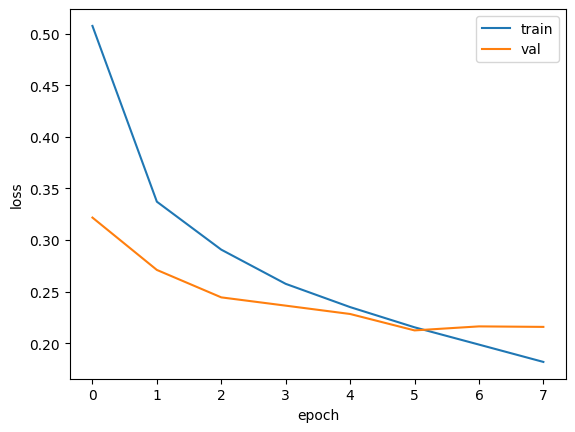

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [13]:
#세트에 대한 성능
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 2s 6ms/step - loss: 0.2125 - accuracy: 0.9234


[0.21252888441085815, 0.9234166741371155]

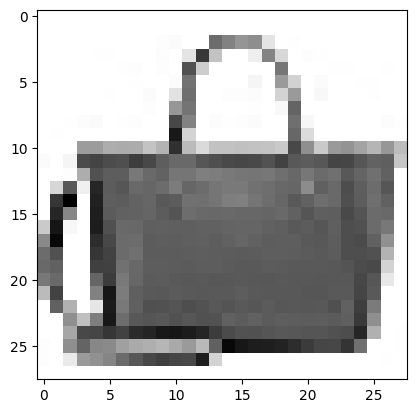

In [14]:
#맷플롯립에서 흑백 이미지에 깊이 차원은 없다. -> 1차원
plt.imshow(val_scaled[0].reshape(28,28), cmap='gray_r')
plt.show()

In [15]:
#어떤 클래스로 예측하는지?
preds = model.predict(val_scaled[0:1])
print(preds) #9번째 

1/1 [==============================] - 0s 124ms/step
[[5.2442073e-14 1.3354595e-24 9.9792537e-19 1.8739256e-17 1.2140919e-15
  8.5862998e-14 6.4820552e-15 2.1251629e-16 1.0000000e+00 6.9566943e-16]]


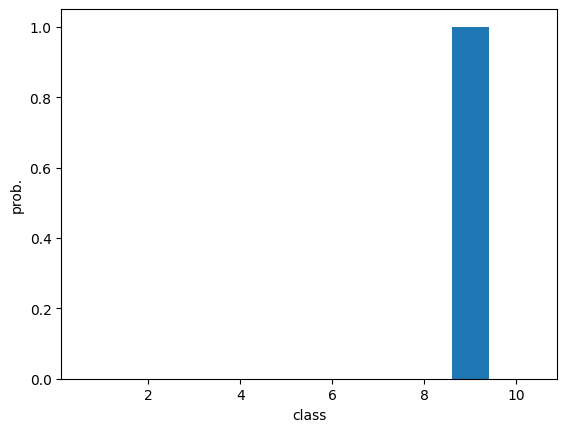

In [16]:
plt.bar(range(1,11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [17]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트',
           '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

In [18]:
import numpy as np
print(classes[np.argmax(preds)])

가방


In [19]:
#테스트 세트로 합성곱 신경망의 일반화 성능 가늠
test_scaled = test_input.reshape(-1,28,28,1) / 255.0
model.evaluate(test_scaled, test_target) #91% 성능

313/313 [==============================] - 2s 7ms/step - loss: 0.2366 - accuracy: 0.9157


[0.23655031621456146, 0.9157000184059143]

## Chapter 08-3 합성곱 신경망의 시각화


In [20]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다.
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

In [21]:
#각 필터는 커널이라 부르는 가중치와 절편을 가진다.
model = keras.models.load_model('best-cnn-model.h5')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd5 in position 29: invalid continuation byte

In [22]:
model.layers

In [24]:
#첫 번째 합성곱 층의 가중치
conv = model.layers[0]
#3,3,1 커널 32개 필터, 필터마다 1개의 절편=32
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [25]:
conv_weights=conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.019090947 0.23400277


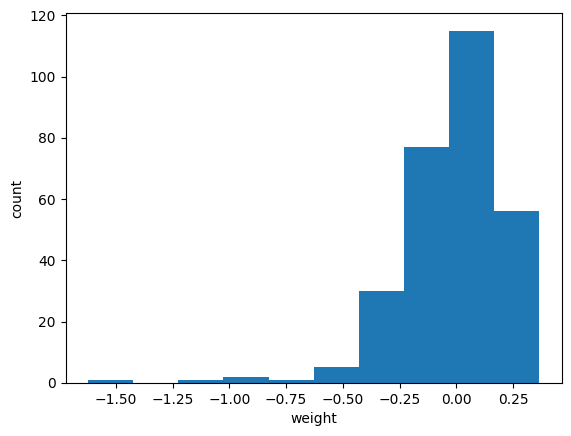

In [26]:
plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

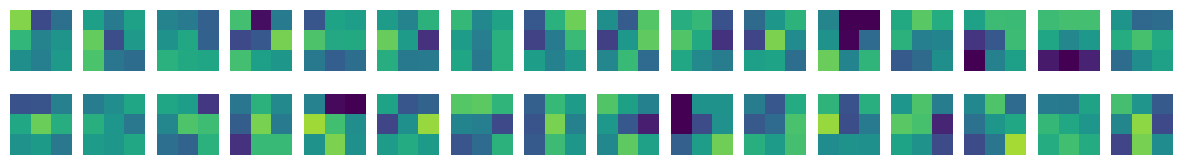

In [27]:
#32개의 커널을 16개씩 2줄로 출력
fig,axs = plt.subplots(2,16,figsize=(15,2))
for i in range(2):
    for j in range(16):
        axs[i,j].imshow(conv_weights[:,:,0,i*16+j], vmin=-0.5, vmax=0.5)
        axs[i,j].axis('off')
plt.show()

In [28]:
#훈련하지 않은 합성곱 신경망
no_training_model = keras.Sequential()

no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
                                          padding='same', input_shape=(28,28,1)))

In [29]:
no_training_conv = no_training_model.layers[0]

print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [30]:
no_training_weights = no_training_conv.weights[0].numpy()

print(no_training_weights.mean(), no_training_weights.std())

-0.0028336649 0.081260495


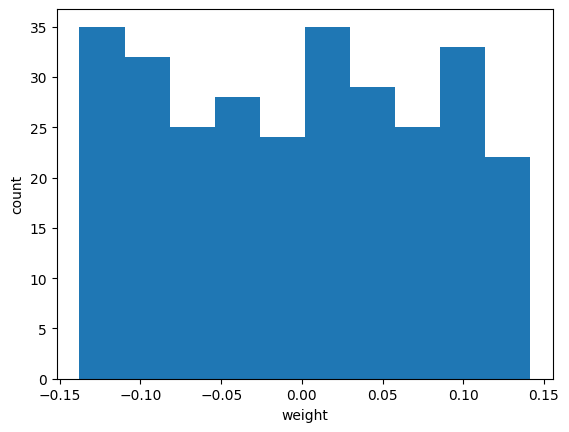

In [31]:
#텐서플로에서 신경망 가중치를 초기화할 때 균등 분포에서 랜덤하게 값 선택하기 때문
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

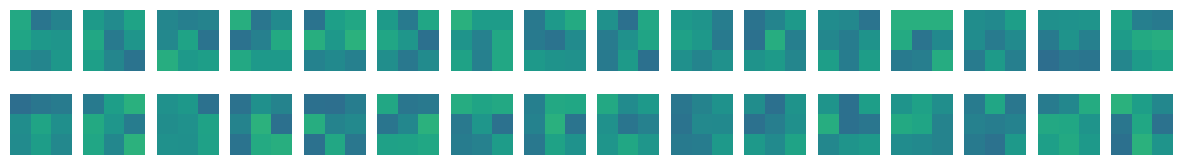

In [32]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))
#밋밋한 색의 결과
for i in range(2):
    for j in range(16):
        axs[i, j].imshow(no_training_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')

plt.show()

In [33]:
#함수형 API : 입력 2개, 출력 2개 등 Sequential 어려울 때
dense1 = keras.layers.Dense(100,activation='sigmoid')
dense2 = keras.layers.Dense(10, activation='softmax')


In [35]:

#inputs는 InputLayer 클래스의 출력값
inputs = keras.Input(shape=(784,))

hidden = dense1(inputs)

In [36]:
outputs = dense2(hidden)
model = keras.Model(inputs, outputs)


In [37]:
#첫 번째 합성곱 층이 출력한 특성 맵을 객체의 입력과 연결
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 784), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")


In [38]:
#이걸 predict 하면 첫번재 합성곱 층의 출력을 반환
conv_acti = keras.Model(model.input, model.layers[0].output)

In [39]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

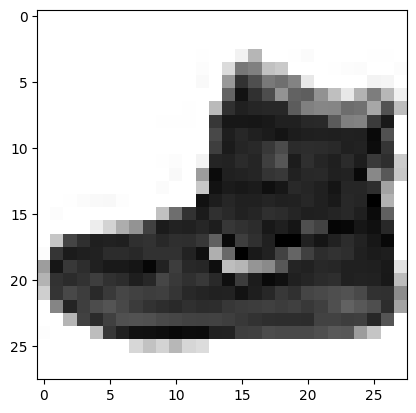

In [40]:
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [42]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1)/255.0

feature_maps = conv_acti.predict(inputs)

ValueError: in user code:

    File "c:\Users\gudtj\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 2341, in predict_function  *
        return step_function(self, iterator)
    File "c:\Users\gudtj\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 2327, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\gudtj\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 2315, in run_step  **
        outputs = model.predict_step(data)
    File "c:\Users\gudtj\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 2283, in predict_step
        return self(x, training=False)
    File "c:\Users\gudtj\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\gudtj\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "model_1" is incompatible with the layer: expected shape=(None, 784), found shape=(None, 28, 28, 1)


In [43]:
#첫 번째 합성곱 층 시각화
print(feature_maps.shape)

NameError: name 'feature_maps' is not defined

NameError: name 'feature_maps' is not defined

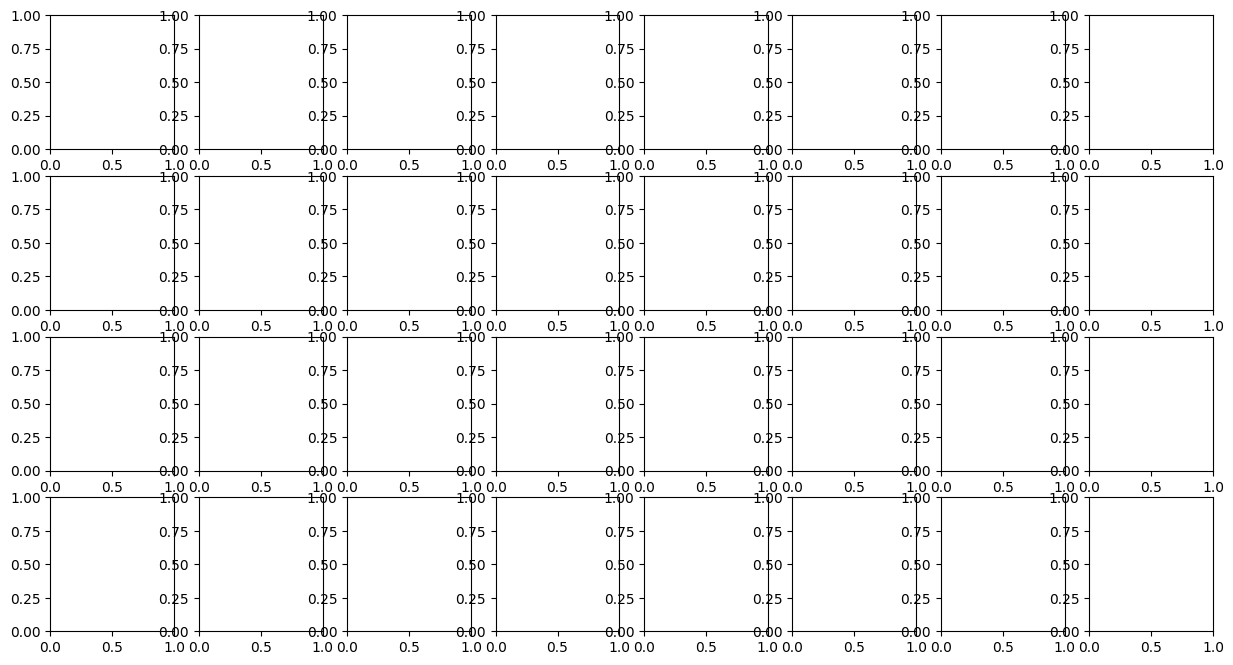

In [44]:
fig, axs = plt.subplots(4, 8, figsize=(15,8))

for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')

plt.show()

In [45]:
#두 번째 합성곱 층 특성 맵
conv2_acti = keras.Model(model.input, model.layers[2].output)

In [46]:
feature_maps = conv2_acti.predict(train_input[0:1].reshape(-1, 28, 28, 1)/255.0)

ValueError: in user code:

    File "c:\Users\gudtj\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 2341, in predict_function  *
        return step_function(self, iterator)
    File "c:\Users\gudtj\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 2327, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\gudtj\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 2315, in run_step  **
        outputs = model.predict_step(data)
    File "c:\Users\gudtj\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 2283, in predict_step
        return self(x, training=False)
    File "c:\Users\gudtj\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\gudtj\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "model_2" is incompatible with the layer: expected shape=(None, 784), found shape=(None, 28, 28, 1)


In [47]:
print(feature_maps.shape)

NameError: name 'feature_maps' is not defined

NameError: name 'feature_maps' is not defined

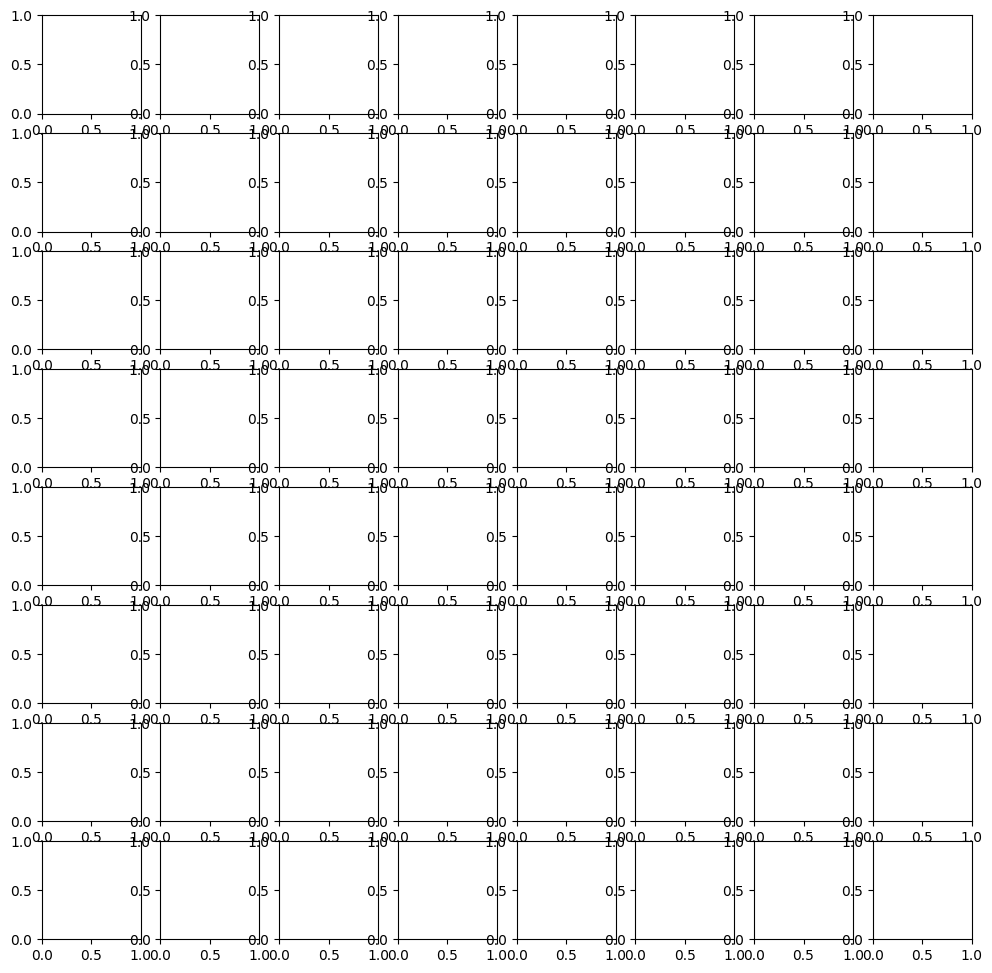

In [48]:
#14,14,32 이기에 어떤 부위를 감지하는지 직관적으로 이해 어려움
#합성곱 층을 많이 쌓을수록 심해진다.
#이는 신경망의 앞부분에 있는 합성곱 층은 이미지의 시각적인 정보를 감지하고
#뒤쪽에 있는 합성곱 층은 앞쪽에서 감지한 정보 바탕으로 추상적인 정보 학습
fig, axs = plt.subplots(8, 8, figsize=(12,12))

for i in range(8):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')

plt.show()